# Manpower Planning of Competency Assessment Method with Gurobi Framework

_by: TK-Bunga Matahari Team_

---

# 0. The Obligatory Part


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gurobipy import Model, GRB, quicksum

# 1. Define the Data Structure

In [3]:
# Full Data?
full = True

# Run this if the data in Local/Repository
if full:
	new_employee_path = "./data/fixed_data_employee.csv"
	new_task_path = "./data/fixed_data_task.csv"
else:
	new_employee_path = "./mini_data/mini_data - employee.csv"
	new_task_path = "./mini_data/mini_data - task.csv"

# Run this if the data in Google Drive
# new_employee_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/fixed/fixed_data_employee.csv'
# new_task_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/fixed/fixed_data_task.csv'

In [4]:
# Read data
employee_skills_df = pd.read_csv(new_employee_path, index_col='No')
# employee_skills_df.drop(columns=['no'], inplace=True, errors='ignore')

employees = employee_skills_df.index.tolist()
skills_name = employee_skills_df.columns[2:].tolist()

employee_skills_df

,employee_id,Role,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
No,,,,,,,,,,,,,,,,,,,,,
1,Talent 1,Data Scientist,1,1,2,1,2,3,3,2,...,1,1,1,2,1,1,1,1,1,2
2,Talent 2,Data Scientist,4,4,4,4,3,5,4,3,...,3,2,1,1,1,1,1,1,1,1
3,Talent 3,Data Analyst,3,2,2,3,2,3,3,2,...,3,3,3,3,2,3,2,3,3,2
4,Talent 4,Data Scientist,3,2,3,2,3,4,3,2,...,3,1,1,2,2,2,2,2,2,2
5,Talent 5,Data Analyst,2,1,3,1,1,1,2,1,...,2,1,1,3,2,5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Talent 107,Data Analyst,1,4,4,3,4,3,4,4,...,5,5,5,3,5,3,4,3,4,2
106,Talent 108,Data Analyst,3,3,3,3,4,2,2,2,...,4,3,4,2,3,3,2,2,3,2
107,Talent 109,Data Engineer,5,5,4,5,3,4,4,3,...,5,5,5,5,5,5,5,5,5,5


In [5]:
skills_name

['Mathematics.Linear Algebra',
 'Mathematics.Differential Equations',
 'Mathematics.Optimization Technique',
 'Mathematics.Calculus',
 'Mathematics.Combinatorics & Graph',
 'Statistics & Probabilities.Statistics',
 'Statistics & Probabilities.Probability & Sampling',
 'Statistics & Probabilities.Bayessian Method',
 'Statistics & Probabilities.Hypothesis Testing',
 'Statistics & Probabilities.A/B Testing',
 'Statistics & Probabilities.CUPED',
 'Data Structures & Algorithms.Complexity Analysis',
 'Data Structures & Algorithms.Programming',
 'Data Structures & Algorithms.Data Structures',
 'Data Structures & Algorithms.Algorithms',
 'Data Structures & Algorithms.Advanced Algorithms',
 'Data Structures & Algorithms.SQL',
 'Data Structures & Algorithms.Shell / Bash Scripting',
 'Econometrics, Data Analysis, and Data Visualization.Data Preprocessing & EDA',
 'Econometrics, Data Analysis, and Data Visualization.Data Viz & Storytelling',
 'Econometrics, Data Analysis, and Data Visualization.Ec

In [6]:
result_moo = pd.read_csv('./output_VM/3_gap_0.025/result_5_MOO_2.csv')
result_moo.head()

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,['P3'],['T270'],8,12,[-0.027166504381694268]
1,Talent 2,"['P3', 'P3']","['T97', 'T166']",11,9,"[-0.017692307692307688, -0.017582417582417582]"
2,Talent 3,"['P2', 'P2']","['T201', 'T297']",11,9,"[-0.01773854560739807, -0.011648351648351648]"
3,Talent 4,"['P5', 'P5']","['T153', 'T296']",10,10,"[-0.01749788672865596, -0.011564986737400529]"
4,Talent 5,['P4'],['T39'],8,12,[-0.029608127721335267]


In [7]:
salary_job_df = pd.read_csv('./data/linreg_salary_job.csv')
salary_job_df.head()

,job_role,junior,middle,senior
0,Artificial intelligence,"15,359,986","20,517,907","34,001,747"
1,Data Analyst,"10,361,232","15,519,153","29,002,993"
2,Data Engineer,"13,996,396","19,154,317","32,638,157"
3,Data Scientist,"16,557,921","21,715,842","35,199,682"


In [8]:
job_roles = salary_job_df['job_role'].unique()
levels = {
    'junior': salary_job_df['junior'],
    'middle': salary_job_df['middle'],
    'senior': salary_job_df['senior']
}
levels

{'junior': 0    15,359,986
 1    10,361,232
 2    13,996,396
 3    16,557,921
 Name: junior, dtype: object,
 'middle': 0    20,517,907
 1    15,519,153
 2    19,154,317
 3    21,715,842
 Name: middle, dtype: object,
 'senior': 0    34,001,747
 1    29,002,993
 2    32,638,157
 3    35,199,682
 Name: senior, dtype: object}

# 2. Exploratory Data Analysis (EDA) of the Result

## 2.1. The Distribution by Role
To see how much the employees we have by Role

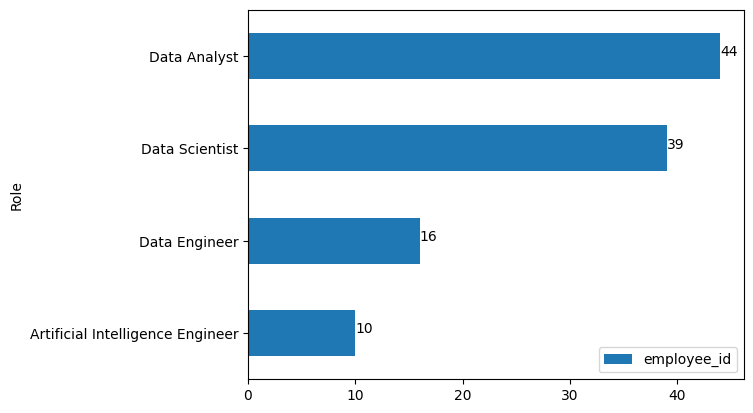

In [9]:
# Plot the horizontal bar chart
ax = employee_skills_df[['Role','employee_id']].groupby('Role', as_index=False).count().sort_values('employee_id',ascending=True)\
.plot(kind='barh', x = 'Role')

# Annotate the values on each bar
for index, value in enumerate(employee_skills_df[['Role','employee_id']].groupby('Role', as_index=False).count().sort_values('employee_id',ascending=True)\
['employee_id']):
    ax.text(value, index, str(value))

plt.show()

## 2.2. The Distribution by Skill Value (3-5)
Value 3-5 can we consider that employees have a good skill in that competency

In [11]:
skills_list = employee_skills_df.drop(['employee_id','Role'], axis=1).columns

In [16]:
for skill in skills_list:
  print(skill,': ',f"""{round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                   (employee_skills_df[skill]>=3)])/112*100,2)}%""")

Mathematics.Linear Algebra :  71.43%
Mathematics.Differential Equations :  63.39%
Mathematics.Optimization Technique :  63.39%
Mathematics.Calculus :  65.18%
Mathematics.Combinatorics & Graph :  59.82%
Statistics & Probabilities.Statistics :  87.5%
Statistics & Probabilities.Probability & Sampling :  80.36%
Statistics & Probabilities.Bayessian Method :  54.46%
Statistics & Probabilities.Hypothesis Testing :  66.07%
Statistics & Probabilities.A/B Testing :  62.5%
Statistics & Probabilities.CUPED :  46.43%
Data Structures & Algorithms.Complexity Analysis :  66.96%
Data Structures & Algorithms.Programming :  89.29%
Data Structures & Algorithms.Data Structures :  89.29%
Data Structures & Algorithms.Algorithms :  86.61%
Data Structures & Algorithms.Advanced Algorithms :  67.86%
Data Structures & Algorithms.SQL :  96.43%
Data Structures & Algorithms.Shell / Bash Scripting :  71.43%
Econometrics, Data Analysis, and Data Visualization.Data Preprocessing & EDA :  94.64%
Econometrics, Data Analy

It is interesting to explore more on certain parts tailored to the role (example: MLOPS - AI, does the percentage of each MLOPS skill match the amount of AI available, or is there a significant difference?)

### 2.2.1. Data Analyst Distribution

The skills mastered by 50% of the population of each role will be explored.

In [18]:
# Data Analyst
print(f"Total Data Analyst percentage in population: {len(employee_skills_df[employee_skills_df['Role']=='Data Analyst'])/len(employee_skills_df)*100}%")
for skill in skills_list:
  if round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                   (employee_skills_df[skill]>=3)&
                  (employee_skills_df['Role']=='Data Analyst')])/112*100,2) >= (42*0.6):
    print(skill,': ',f"""{round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                    (employee_skills_df[skill]>=3)&
                    (employee_skills_df['Role']=='Data Analyst')])/112*100,2)}%""")

Total Data Analyst percentage in population: 40.36697247706422%
Statistics & Probabilities.Statistics :  33.93%
Statistics & Probabilities.Probability & Sampling :  27.68%
Statistics & Probabilities.Hypothesis Testing :  25.89%
Data Structures & Algorithms.Programming :  32.14%
Data Structures & Algorithms.Data Structures :  33.93%
Data Structures & Algorithms.Algorithms :  31.25%
Data Structures & Algorithms.SQL :  38.39%
Econometrics, Data Analysis, and Data Visualization.Data Preprocessing & EDA :  36.61%
Econometrics, Data Analysis, and Data Visualization.Data Viz & Storytelling :  35.71%
Econometrics, Data Analysis, and Data Visualization.Regression Analysis :  30.36%
Econometrics, Data Analysis, and Data Visualization.Time Series Analysis :  28.57%
Econometrics, Data Analysis, and Data Visualization.Correlation Analysis :  30.36%
Data & Cloud Engineering.Relational DB :  33.04%


dari skill-skill yang dikuasai oleh kurang lebih 60% Data Analyst:
- Data Analyst menguasai beberapa topic: Statistics & Probabilities (3/6), Data Structures & Algorithms (4/7), Econometrics, Data Analysis, and Data Visualization (5/8), Relational DB.
- Dari topic Statistics & Probabilities, banyak talent kita yang menguasai Statistics, sementara lebih sedikit untuk skill Probability & Sampling dan Hypothesis Testing (mungkin dikarenakan use case di telkom belum mengerjakan A/B Testing)
- Dari topic Data Structures & Algorithms, talent kita sangat menguasai SQL, Data Structures, Programming, dan Algorithms.
- Dari topic Econometrics, Data Analysis, and Data Visualization, talent kita sangat menguasai Data Preprocessing & EDA, Data Viz & Storytelling, Regression Analysis, Time Series Analysis, and Correlation Analysis.
- Dari topic Data & Cloud Engineering, talent kita hanya menguasai Relational DB.

### 2.2.2. Data Scientist Distribution

In [19]:
# Data Scientist
print(f"Total Data Scientist percentage in population: {len(employee_skills_df[employee_skills_df['Role']=='Data Scientist'])/len(employee_skills_df)*100}%")
for skill in skills_list:
  if round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                   (employee_skills_df[skill]>=3)&
                  (employee_skills_df['Role']=='Data Scientist')])/112*100,2) >= (35*0.6):
    print(skill,': ',f"""{round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                    (employee_skills_df[skill]>=3)&
                    (employee_skills_df['Role']=='Data Scientist')])/112*100,2)}%""")

Total Data Scientist percentage in population: 35.77981651376147%
Mathematics.Linear Algebra :  31.25%
Mathematics.Differential Equations :  29.46%
Mathematics.Optimization Technique :  27.68%
Mathematics.Calculus :  29.46%
Mathematics.Combinatorics & Graph :  25.89%
Statistics & Probabilities.Statistics :  34.82%
Statistics & Probabilities.Probability & Sampling :  33.93%
Statistics & Probabilities.Bayessian Method :  26.79%
Statistics & Probabilities.Hypothesis Testing :  28.57%
Statistics & Probabilities.A/B Testing :  26.79%
Data Structures & Algorithms.Complexity Analysis :  25.89%
Data Structures & Algorithms.Programming :  33.93%
Data Structures & Algorithms.Data Structures :  32.14%
Data Structures & Algorithms.Algorithms :  32.14%
Data Structures & Algorithms.Advanced Algorithms :  23.21%
Data Structures & Algorithms.SQL :  34.82%
Data Structures & Algorithms.Shell / Bash Scripting :  24.11%
Econometrics, Data Analysis, and Data Visualization.Data Preprocessing & EDA :  34.82%

dari skill-skill yang dikuasai oleh kurang lebih 60% Data Scientist:
- Data scientist hampir menguasai semua topic kecuali MLOps.
- Dari topic **Mathematics**, hampir semua skill dikuasai talent dengan **Combinatorics & Graph** menjadi skill yang paling sedikit dibanding skill lain.
- Dari topic **Statistics & Probabilities**, hampir semua menguasai **Statistics** dan **Probability & Sampling**.
- Dari topic **Data Structures & Algorithms**, talent kita sangat menguasai SQL, Data Structures, Programming, dan Algorithms.
- Dari topic Econometrics, Data Analysis, and Data Visualization, talent kita sangat menguasai Data Preprocessing & EDA, Data Viz & Storytelling, Regression Analysis, Time Series Analysis, and Correlation Analysis.
- Dari topic Data & Cloud Engineering, talent kita hanya menguasai Relational DB.

### 2.2.3. Data Engineer Distribution

In [20]:
# Data Engineer
print(f"Total Data Engineer percentage in population: {len(employee_skills_df[employee_skills_df['Role']=='Data Engineer'])/len(employee_skills_df)*100}%")
for skill in skills_list:
  if round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                   (employee_skills_df[skill]>=3)&
                  (employee_skills_df['Role']=='Data Engineer')])/112*100,2) >= 7:
    print(skill,': ',f"""{round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                    (employee_skills_df[skill]>=3)&
                    (employee_skills_df['Role']=='Data Engineer')])/112*100,2)}%""")

Total Data Engineer percentage in population: 14.678899082568808%
Mathematics.Linear Algebra :  8.04%
Mathematics.Calculus :  7.14%
Statistics & Probabilities.Statistics :  9.82%
Statistics & Probabilities.Probability & Sampling :  9.82%
Data Structures & Algorithms.Complexity Analysis :  13.39%
Data Structures & Algorithms.Programming :  14.29%
Data Structures & Algorithms.Data Structures :  14.29%
Data Structures & Algorithms.Algorithms :  14.29%
Data Structures & Algorithms.Advanced Algorithms :  11.61%
Data Structures & Algorithms.SQL :  14.29%
Data Structures & Algorithms.Shell / Bash Scripting :  14.29%
Econometrics, Data Analysis, and Data Visualization.Data Preprocessing & EDA :  14.29%
Econometrics, Data Analysis, and Data Visualization.Data Viz & Storytelling :  11.61%
Econometrics, Data Analysis, and Data Visualization.Regression Analysis :  8.93%
Econometrics, Data Analysis, and Data Visualization.Time Series Analysis :  9.82%
Econometrics, Data Analysis, and Data Visualiza

### 2.2.4. Artificial Intelligence Distribution

In [21]:
# AI Engineer
print(f"Total Artificial Intelligence Engineer percentage in population: {len(employee_skills_df[employee_skills_df['Role']=='Artificial Intelligence Engineer'])/len(employee_skills_df)*100}%")
for skill in skills_list:
  if round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                   (employee_skills_df[skill]>=3)&
                  (employee_skills_df['Role']=='Artificial Intelligence Engineer')])/112*100,2) >= 4:
    print(skill,': ',f"""{round(len(employee_skills_df[(employee_skills_df[skill]<=5)&
                    (employee_skills_df[skill]>=3)&
                    (employee_skills_df['Role']=='Artificial Intelligence Engineer')])/112*100,2)}%""")

Total Artificial Intelligence Engineer percentage in population: 9.174311926605505%
Mathematics.Linear Algebra :  8.93%
Mathematics.Differential Equations :  8.04%
Mathematics.Optimization Technique :  8.93%
Mathematics.Calculus :  8.04%
Mathematics.Combinatorics & Graph :  8.93%
Statistics & Probabilities.Statistics :  8.93%
Statistics & Probabilities.Probability & Sampling :  8.93%
Statistics & Probabilities.Bayessian Method :  6.25%
Statistics & Probabilities.Hypothesis Testing :  5.36%
Statistics & Probabilities.A/B Testing :  7.14%
Statistics & Probabilities.CUPED :  6.25%
Data Structures & Algorithms.Complexity Analysis :  7.14%
Data Structures & Algorithms.Programming :  8.93%
Data Structures & Algorithms.Data Structures :  8.93%
Data Structures & Algorithms.Algorithms :  8.93%
Data Structures & Algorithms.Advanced Algorithms :  8.04%
Data Structures & Algorithms.SQL :  8.93%
Data Structures & Algorithms.Shell / Bash Scripting :  8.93%
Econometrics, Data Analysis, and Data Visua

## 2.1. The Distribution of the Competency Assessment Result



## 2.2. The Distribution of the Competency Assessment Result by Job Title

## 2.3. The Distribution of the Competency Assessment Result by Job Title and Competency

In [10]:
import pandas as pd
from gurobipy import Model, GRB, quicksum

# Load the datasets
result_5_MOO_2 = pd.read_csv('./output_VM/3_gap_0.025/result_5_MOO_2.csv')
linreg_salary_job = pd.read_csv('./data/linreg_salary_job.csv')

# Extract job roles and levels
job_roles = linreg_salary_job['job_role'].unique()
levels = {
    'junior': salary_job_df['junior'],
    'middle': salary_job_df['middle'],
    'senior': salary_job_df['senior']
}

KeyError: 'middl '

In [ ]:
model = Model


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 5 5500U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 41 rows, 24 columns and 72 nonzeros
Model fingerprint: 0x45bbcb37
Variable types: 0 continuous, 24 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+03, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+02]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
Optimal solution found:
